In [1]:
#Import Libraries
import pandas as pd
import string
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import rcParams
import pandas as pd
from collections import Counter
from itertools import chain
#from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings("ignore")
import collections
import os
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
rcParams['figure.figsize'] = 20,12
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the data
reviews = pd.read_csv(r"reviews_all_preprocessed.csv")
stop1 = ['food','good','nice','price','place','servic','restaur','visit','friendli','thessaloniki','order','great','dish','recommend','amaz','one','realli','us','serv','staff','qualiti','’','time', 'tri', 'experi', 'come', 'small', 'local', 'even', 'excel', 'reason', 'atmospher', 'best', 'love', 'enjoy', 'would', 'greek', 'well', 'also', 'fresh', 'back', 'like', 'tast', 'wine', 'definit', 'tabl', 'offer', 'menu', 'salad', 'drink', 'waiter', 'tradit', 'tasti', 'delici', 'day', 'peopl', 'go', 'meal', 'fish', 'dinner', 'eat', 'cook', 'portion', 'look', 'meat', 'citi', 'everyth', 'music', 'locat', 'lunch','town', 'warm', 'year', 'outsid', 'street', 'chicken', 'coffe', 'night', 'perfect', 'much', 'want', 'view', 'got', 'plate', 'littl', 'sea', 'expect', 'owner', 'ok', 'make', 'way', 'next', 'sit', 'wait', 'pizza', 'friend', 'cuisin', 'high', 'lot', 'differ', 'kind', 'noth', 'special', 'choic', 'decor', 'live', 'greec', 'alway', 'center', 'better', 'bread', 'ask', 'help', 'dont', 'get', 'mani', 'top', 'fantast', 'thing', 'say', 'two', 'first', 'didnt', 'busi', 'went', 'came', 'cours', 'though', 'polit', 'find', 'fast', 'end', 'grill', 'take', 'found', 'ever', 'quit', 'euro', 'wonder', 'everi', 'starter', 'bar', 'area', 'main', '2', 'full', 'hous', 'highli', 'could', 'burger', 'chees', 'made', 'big', 'valu', 'must', 'select', 'smoke', 'beauti', 'last', 'around', 'someth', 'varieti', 'money', 'feel', 'fri', 'beer', 'seafood', 'bit', 'insid', 'sure', 'worth', 'expens', 'disappoint', 'need', 'ate', 'famili', 'dessert','\"','”','“']

# Basic Visualizations

## Number of Monthly Reviews

In [3]:
#Count the reviews of each month
months =  reviews['Rating_Month'].value_counts()
months_df = months.reset_index()
df_mapping = pd.DataFrame({
    'months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
})

#Sort the results based on the specified order
sort_mapping = df_mapping.reset_index().set_index('months')
months_df['test'] = months_df['index'].map(sort_mapping['index'])
months_df = months_df.sort_values('test')
months_df.drop(columns = ['test'],inplace = True)
months_df.reset_index(drop =True,inplace = True)
months_df.set_index('index', inplace=True)

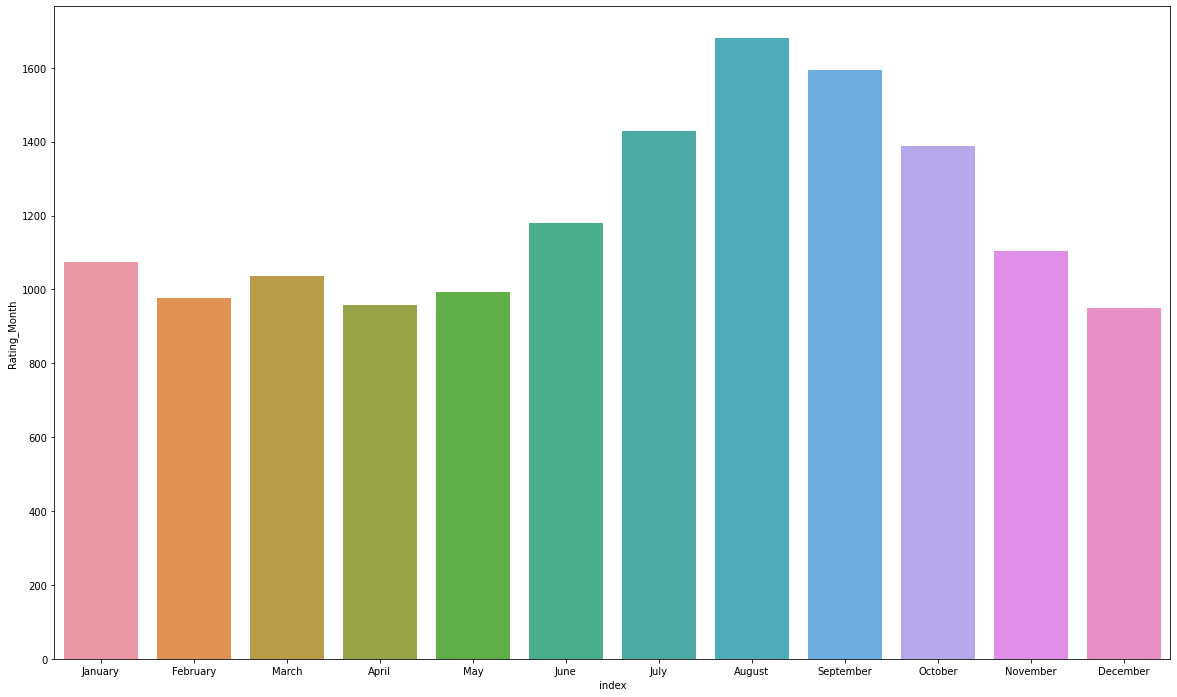

In [4]:
#Create a barplot
ax = sns.barplot(x = months_df.index, y = "Rating_Month", data = months_df)

## Most Common Words, Bi-grams, Tri-grams

In [6]:
from wordcloud import WordCloud

In [7]:
#Unify all the words used in reviews (unigrams) as well as two and three words that occur successively along with their
#frequencies in dictionaries
temp_uni = []
for i in range(len(reviews)):
    temp_uni += reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

In [ ]:
#create a dataframe which stores the words and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns = ['word', 'frequency'])
#sort words based on their frequencies
unigrams.sort_values(by = ['frequency'],ascending = False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Create a dataframe that contains reviews with score equals to 50
five_star_reviews = reviews.loc[reviews['Score'] == 50]

#Create a dataframe that contains reviews with score equals to 10
one_star_reviews = reviews.loc[reviews['Score'] == 10]

#Reset index
five_star_reviews.reset_index(drop = True, inplace = True)
one_star_reviews.reset_index(drop = True, inplace = True)

## One-star Reviews

In [ ]:
#Store unigrams, bigrams, trigrams and their frequencies in a dictionary
temp_uni = []
for i in range(len(one_star_reviews)):
    temp_uni += one_star_reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

In [ ]:
#create a dataframe which stores the unigrams and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns=['word', 'frequency'])
unigrams.sort_values(by = ['frequency'],ascending=False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Five-star Reviews

In [ ]:
#Store unigrams, bigrams, trigrams and their frequencies in a dictionary
temp_uni = []
for i in range(len(five_star_reviews)):
    temp_uni += five_star_reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

In [ ]:
#create a dataframe which stores the unigrams and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns=['word', 'frequency'])
unigrams.sort_values(by = ['frequency'],ascending=False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()